In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

start_date = '2022-01-01'
end_date = '2023-01-01'

In [ ]:
shop = yf.Ticker("SHOP")

shopInfo = {
    "(Information)":"(Value)",
    "Company Name": shop.info['longName'],
    "Domestic Ticker":  shop.info['symbol'],
    'Insustry': shop.info['industry'],
    'Sector': shop.info['sector'],
    "Website": shop.info['website'],
    "Location": f"{shop.info['city']}, {shop.info['state']}, {shop.info['country']}",
    "Domestric Stock Exchange":shop.info['exchange'],
}
shopInfo_df = pd.DataFrame([shopInfo])

#part B: extract info from interlisted-companies.csv
df = pd.read_csv("interlisted-companies.csv")
shopInfo_df["Foreign Exchange"] = df.loc[df["Name"] == shop.info['longName'], "International Market"].values[0]

#part C:foreign ticker
#shopInfo_df["Foregin Ticker YFinance"] = shop.info['symbol']
shopInfo_df["Foreign Ticker CSV"] = df.loc[df["Name"] == shop.info['longName'], "US Symbol"].values[0]

#printing results
print(shopInfo_df.T.to_string())

### Getting Exchange Rate Data

In [ ]:
exchange_rate = yf.Ticker("CADUSD=x")
rate_y2y = exchange_rate.history(start= start_date, end=end_date,interval ='1d')
rate_y2y.index = rate_y2y.index.strftime('%Y-%m-%d')
print(rate_y2y.dropna().head(5))

### Creating the plots

In [ ]:
#get data (canadians)
can_shop_prices = shop.history(start = start_date, end = end_date,)
can_shop_prices = can_shop_prices[['Close']]
can_shop_prices.index = can_shop_prices.index.strftime('%Y-%m-%d')
#print(can_shop_prices)

#create 1st subplot for Canadian price
fig, axes = plt.subplots(2,2,figsize=(13,13))
axes[0,0].plot(can_shop_prices.index, can_shop_prices["Close"])
axes[0, 0].set_title("Canadian Shopify Closing Prices")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Close Price")
date = ['2022-01-04', '2022-04-04','2022-07-05','2022-10-03']
axes[0, 0].set_xticks(date)
axes[0, 0].tick_params(rotation=15)

#US stock

us_shop = yf.Ticker(str(shopInfo_df["Foreign Ticker CSV"].iloc[0]))
us_shop_prices = us_shop.history(start = start_date, end = end_date)
us_shop_prices = us_shop_prices[['Close']]
us_shop_prices.index = us_shop_prices.index.strftime('%Y-%m-%d')

axes[0, 1].plot(us_shop_prices.index, us_shop_prices["Close"])
axes[0, 1].set_title("American Shopify Closing Prices")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Close Price")
date = ['2022-01-04', '2022-04-04','2022-07-05','2022-10-03']
axes[0, 1].set_xticks(date)
axes[0, 1].tick_params(rotation=15)

#third graph
temp_df = us_shop_prices.copy()
temp_df.index = us_shop_prices.index
temp_df["USACAD_ratio"]= us_shop_prices['Close']/can_shop_prices["Close"]

axes[1, 0].plot(temp_df.index, temp_df["USACAD_ratio"])
axes[1, 0].set_title("SHOP USD/CAD Price")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Ratio")
date = ['2022-01-04', '2022-04-04','2022-07-05','2022-10-03']
axes[1, 0].set_xticks(date)
axes[1, 0].tick_params(rotation=15)

#create new data graph to store

#coversion rate 4th grapg
axes[1, 1].plot(rate_y2y.index, rate_y2y["Close"])
axes[1, 1].set_title("USD vs CAD Exchange Rate")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Exchange rate (CAD = X USD)")
date = ['2022-01-04', '2022-04-04','2022-07-05','2022-10-03']
axes[1, 1].set_xticks(date)
axes[1, 1].tick_params(rotation=15)

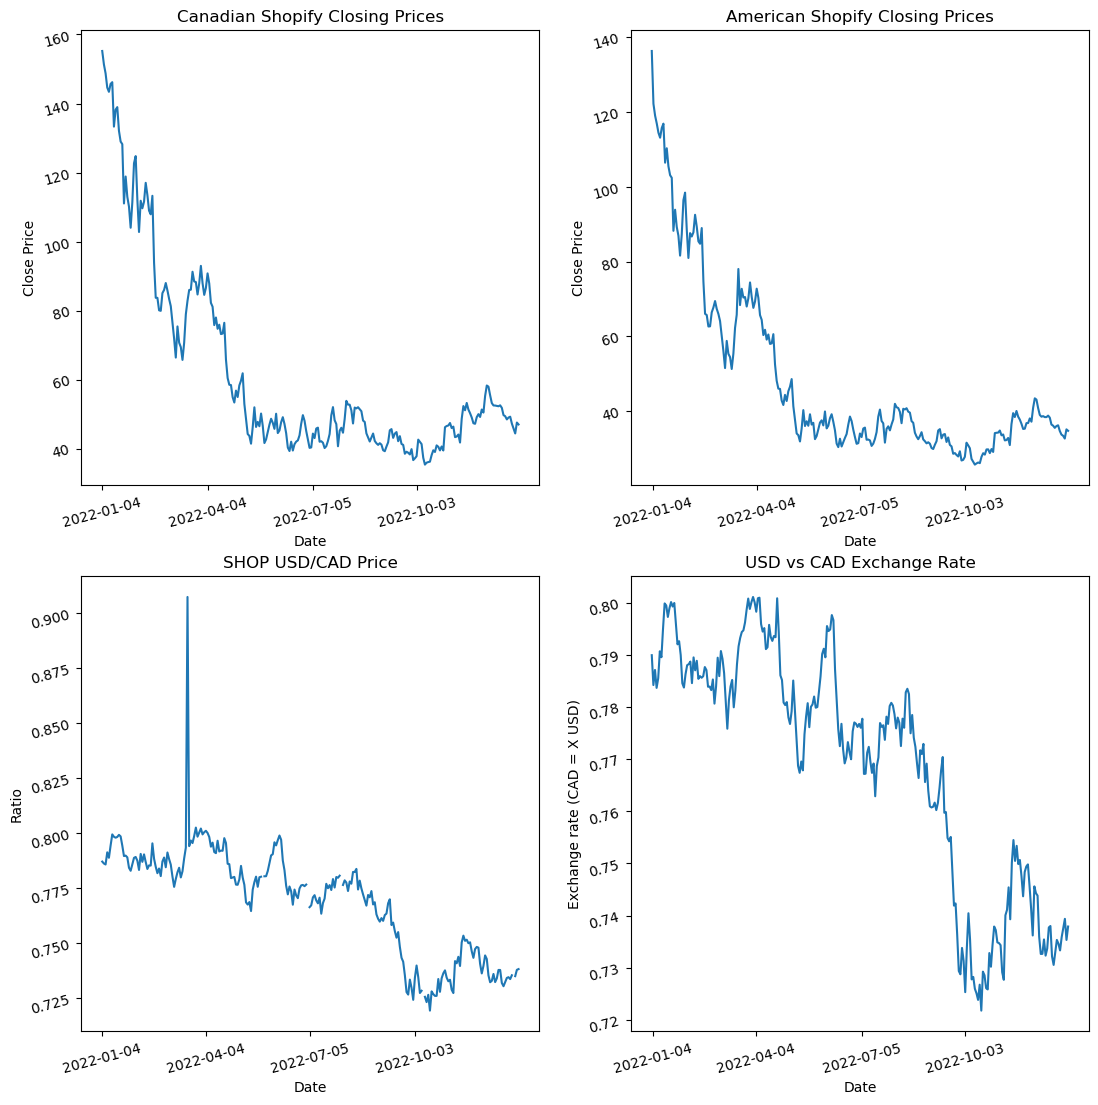

In [ ]:
plt.scatter((temp_df["Implied_Close_Price"]- can_shop_prices['Close']).index, (can_shop_prices['Close']-temp_df["Implied_Close_Price"]))
plt.title("Price Difference")
plt.xlabel("Date")
plt.ylabel("Difference ($)")
date = ['2022-01-04', '2022-04-04','2022-07-05','2022-10-03']
plt.gca().set_xticks(date)  # Set positions for the x-ticks


# Set the custom labels for those ticks
plt.gca().set_xticklabels(date)

plt.axhline(y=0, color='r', linestyle='-')

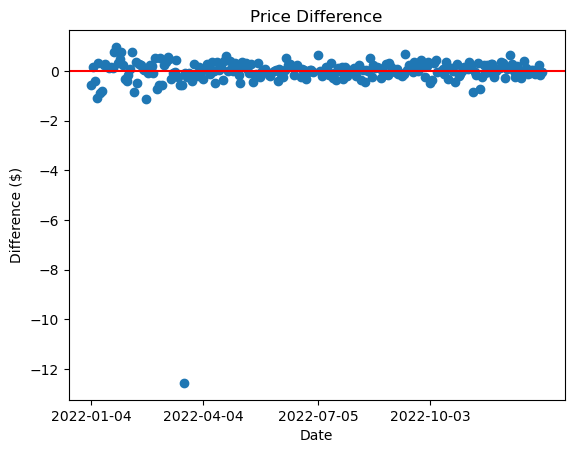